# HW4 - Data Analysis & Make Prediction Models

#### Data Science in Korea University, Prof. Jaewoo Kang
#### COSE471, Spring 2020
#### Due : 7/01 (wednes)  11:59 PM [Through Black board]

## Assignment Credit

### Your assignments are 40% of the total score. The scores for each assignment are as follows.
- __HW#1: 5%__
- __HW#2: 10%__
- __HW#3: 10%__
- __HW#4: 15%__

## Python Assingment HW4 Guide
- You need to fill out your code in ###YOUR CODE HERE### or #TODO.
- The code results should be the same as the results displayed below the code or the format we gave in problem description.
- When solving descriptive problems, both __Korean and English are available.__
- The some libraries are already imported below. __But you should import more.__
    - If you don't have some libraries, install it with pip or conda command. [Google will help you]

## Problem1. Scikit-learn
- Scikit-learn is the most common python library in machine learning.
- Let's port our work from matplotlib to scikit-learn.
- However, not all plots will be handled. We will focus on the most recent data, 2010-2015.

<b>URL:</b> http://scikit-learn.org/
<br/><b>Install guide:</b> http://scikit-learn.org/stable/install.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import time
from datetime import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import nltk
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Problem1. Regression Model
## -Amzon stock price prediction.

### Problem 1-1
- In this problem you will predict stock price only with price related data. People usually call it as Technical analysis.
- Find best combination of parameters to predict next day price.
- __Your MSE loss should be lower than 30.__

In [2]:
# TODO : load data 'AMZN.csv'
raw_data = pd.read_csv("data/AMZN.csv")

In [3]:
raw_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
5,1997-05-22,1.437500,1.447917,1.312500,1.395833,1.395833,11776800
6,1997-05-23,1.406250,1.520833,1.333333,1.500000,1.500000,15937200
7,1997-05-27,1.510417,1.645833,1.458333,1.583333,1.583333,8697600
8,1997-05-28,1.625000,1.635417,1.531250,1.531250,1.531250,4574400
9,1997-05-29,1.541667,1.541667,1.479167,1.505208,1.505208,3472800


<br/><br/>
- We will use only __one kind of variable__ for __last 'lookback' days__ to predict next day close price.<br/>
For example, if we set lookback days as 5, and use close price for our independent variable.<br/><br/>
Close price of [1997-05-15, 1997-05-16, 1997-05-19, 1997-05-20, 1997-05-21] --> predict [1997-05-22] <br/><br/>

In [4]:
"""
TODO : make get_concated_data function.
       this function create x and y data

@Function
get_concated_data

@Inputs
__
raw_data : dataframe, full Amazon stock data.
     

@Returns
___

x_data 
    : <class 'numpy.ndarray'>
    : crteated data should in shape of [len(raw_data)-lookback, lookback]
    : x_data should be made based on 'col_name', parameters of the function, variable we will use
    
y_data 
    : <class 'numpy.ndarray'>
    : crteated data should in shape of [len(raw_data)-lookback]
    : y should be always made based on 'Close'.
"""

"\nTODO : make get_concated_data function.\n       this function create x and y data\n\n@Function\nget_concated_data\n\n@Inputs\n__\nraw_data : dataframe, full Amazon stock data.\n     \n\n@Returns\n___\n\nx_data \n    : <class 'numpy.ndarray'>\n    : crteated data should in shape of [len(raw_data)-lookback, lookback]\n    : x_data should be made based on 'col_name', parameters of the function, variable we will use\n    \ny_data \n    : <class 'numpy.ndarray'>\n    : crteated data should in shape of [len(raw_data)-lookback]\n    : y should be always made based on 'Close'.\n"

In [5]:
# We will use only one kind of variable as a time series data
def get_concated_data(raw_data, col_name, lookback):
    x_data = np.zeros(shape=(raw_data.shape[0]-lookback, 2))
    y_datas = list()
    # col_name : Variable to be used
    col_data = raw_data[col_name].values
    # aggregate target variable data for length of lookback days
    
    ##### Your Code Here ####
    for i in range(0, raw_data.shape[0]-lookback):
        x_data[i] = [col_data[i], col_data[i+1]]
    y_datas = raw_data['Close'].values[2:raw_data.shape[0]-lookback+2]
   ########################## 
    y_data = np.asarray(y_datas)

    return x_data, y_data

In [6]:
"""
TODO : make split_data function which split train / test (last 60 data, approximately 3 month)

@Function
split_datas

@Inputs
__
data : numpy array
     
@Returns
___
x_train, x_test, y_train, y_test
    :<class 'numpy.ndarray'>

"""

"\nTODO : make split_data function which split train / test (last 60 data, approximately 3 month)\n\n@Function\nsplit_datas\n\n@Inputs\n__\ndata : numpy array\n     \n@Returns\n___\nx_train, x_test, y_train, y_test\n    :<class 'numpy.ndarray'>\n\n"

In [7]:
def split_datas(x,y):
    ##### Your Code Here ####

    x_train = x[:-60]
    y_train = y[:-60]
    
    x_test = x[-60:]
    y_test = y[-60:]
    ###########################
    return x_train, x_test, y_train, y_test

In [8]:
x, y = get_concated_data(raw_data, 'Low', 1000)

In [9]:
x_train, x_test, y_train, y_test = split_datas(x, y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4228, 2), (4228,), (60, 2), (60,))

### <br/>Problem 1-2 Find best parameter combination 
- You can choose which __columns to use__ as variable for __how many days__, and in which __polynomial space.__
- Find the best combination of parameters to predict next day price.
- __Find combination which makes MSE loss for train data lower than 6.__

In [10]:
# TODO : complete run_regression function
# Hint : use api i gave below

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

def run_regression(raw_data, column_name, lookback_days, poly_degree):
    # performing regression analysis with specified parameters
    x, y = get_concated_data(raw_data, column_name, lookback_days)
    x_train, x_test, y_train, y_test = split_datas(x, y)

    ##### Your Code Here ####
    poly = PolynomialFeatures(degree=poly_degree)
    model = LinearRegression()

    x_poly = x_train[:,0]
    x_poly = np.reshape(x_poly, (-1,1))
    X_poly = poly.fit_transform(x_poly)
    X_train = x_train[:,1]
    X_train = np.reshape(X_train, (-1,1))
    X_test = x_test[:,1]
    X_test = np.reshape(X_test, (-1,1))
    
    model.fit(X_poly, X_train)
    ########################
    #print ("MSE - Train %.4f"%mean_squared_error(model.predict(poly.fit_transform(X_train)), y_train))
    #print ("MSE - Test %.4f"%mean_squared_error(model.predict(poly.fit_transform(X_test)), y_test))
    
    test_pred = model.predict(poly.fit_transform(X_test))
                              
    return test_pred, y_test, mean_squared_error(model.predict(poly.fit_transform(X_train)), y_train), mean_squared_error(model.predict(poly.fit_transform(X_test)), y_test)

In [12]:
# TODO : run experiment with various combination
n = 100000000
m = 100000000
o = 0
p = 0
for i in range(100,5000):
    for j in range(2,8):
        test_pred, y_test, a, b = run_regression(raw_data, column_name="Low", lookback_days=i, poly_degree=j)
        if b <= m and a <= n :
            n = a
            m = b
            o = i
            p = j

print(str(n) + ', '+ str(m) + ', ' + str(o) + ', ' + str(p))

0.5217958204277467, 1.6387864394868403, 4909, 7


Write Combination that you've found. (Train loss lower than 6) <br/><br/>
Variable : low      <br/>
Lookback : 4909      <br/>
Poly_degree : 7<br/>

### Problem 1-3 Overfitting & Underfitting
1. Briefly explain about the concept of overfitting and underftting with proper example that you can find from experiment above.
2. In the above problem desciption, I set your goal as fiding best parameters for total data loss. What is wrong with it? 

### YOUR ANSWER HERE ###

오버피팅은 train loss 자체는 작지만, train에 너무 적합한 나머지 새로운 input에 대해선 오차가 굉장히 커지는 것을 말한다.
언더피팅은 train loss도 크고, 테스트할 input에 대해서도 오차가 커진다.

Overfitting : lookback_days = 4995, poly_degree = 7
Underfitting : lookback_days = 103, poly_degree = 1

train loss 자체가 제일 작아지는 파라미터라 해서 새로운 값이 들어왔을 때의 값을 잘 예측하는 것은 아니다. Overfitting되는 경우 test loss는 매우 높아질 것이다.

### Problem 1-4 Visualization
- Visualize your predicton.
- You can use code below with proper variable.
- __Your best model's prediction --> best_pred.__

In [13]:
# TODO : Assign your best prediction for test data to best_pred

best_pred, y_test, a, b = run_regression(raw_data, column_name="Low", lookback_days=4909, poly_degree=7)
a, b

(0.5217958204277467, 1.6387864394868403)

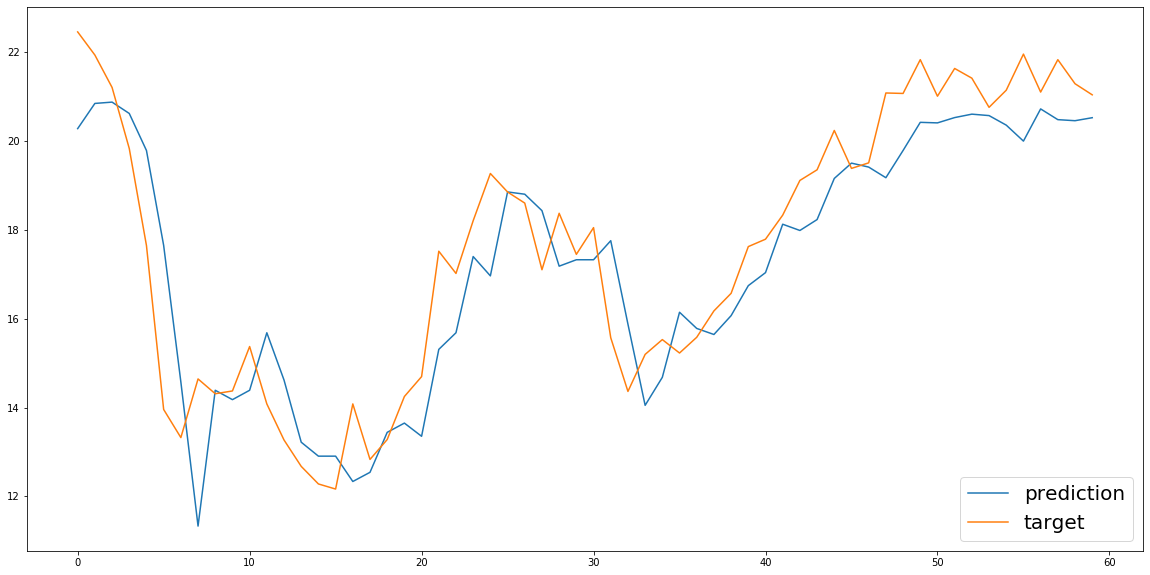

In [14]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(best_pred, label='prediction')
plt.plot(y_test, label='target')
plt.legend(loc='best', fontsize=20)
plt.show()

## Problem2. Regression Model
## -Covid Confirmed prediction.

In [15]:
#import covidall dataset 
train = pd.read_csv('data/train.csv')
all_data = pd.read_csv('data/covid_all.csv') #set your working directory
all_data

,Unnamed: 0,index,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,ForecastId,Day_num,...,Trend_Fatalities_2,Trend_Fatalities_3,Trend_Fatalities_4,Trend_Fatalities_5,Trend_Fatalities_6,Population (2020),Density,Land Area,Med Age,Urban Pop
0,0,0,1.0,83,0,2020-01-22,0.0,0.0,-1.0,0,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
1,1,1,2.0,83,0,2020-01-23,0.0,0.0,-1.0,1,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
2,2,2,3.0,83,0,2020-01-24,0.0,0.0,-1.0,2,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
3,3,3,4.0,83,0,2020-01-25,0.0,0.0,-1.0,3,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
4,4,4,5.0,83,0,2020-01-26,0.0,0.0,-1.0,4,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35677,35677,13454,-1.0,83,183,2020-05-10,0.0,0.0,13455.0,109,...,0.0,0.0,0.0,0.0,0.0,14818157.0,38.0,386850.0,19.0,38.0
35678,35678,13455,-1.0,83,183,2020-05-11,0.0,0.0,13456.0,110,...,0.0,0.0,0.0,0.0,0.0,14818157.0,38.0,386850.0,19.0,38.0
35679,35679,13456,-1.0,83,183,2020-05-12,0.0,0.0,13457.0,111,...,0.0,0.0,0.0,0.0,0.0,14818157.0,38.0,386850.0,19.0,38.0
35680,35680,13457,-1.0,83,183,2020-05-13,0.0,0.0,13458.0,112,...,0.0,0.0,0.0,0.0,0.0,14818157.0,38.0,386850.0,19.0,38.0


In [16]:
country_dict = {'Afghanistan': 0,
 'Albania': 1,
 'Algeria': 2,
 'Andorra': 3,
 'Angola': 4,
 'Antigua and Barbuda': 5,
 'Argentina': 6,
 'Armenia': 7,
 'Australia': 8,
 'Austria': 9,
 'Azerbaijan': 10,
 'Bahamas': 11,
 'Bahrain': 12,
 'Bangladesh': 13,
 'Barbados': 14,
 'Belarus': 15,
 'Belgium': 16,
 'Belize': 17,
 'Benin': 18,
 'Bhutan': 19,
 'Bolivia': 20,
 'Bosnia and Herzegovina': 21,
 'Botswana': 22,
 'Brazil': 23,
 'Brunei': 24,
 'Bulgaria': 25,
 'Burkina Faso': 26,
 'Burma': 27,
 'Burundi': 28,
 'Cabo Verde': 29,
 'Cambodia': 30,
 'Cameroon': 31,
 'Canada': 32,
 'Central African Republic': 33,
 'Chad': 34,
 'Chile': 35,
 'China': 36,
 'Colombia': 37,
 'Congo (Brazzaville)': 38,
 'Congo (Kinshasa)': 39,
 'Costa Rica': 40,
 "Cote d'Ivoire": 41,
 'Croatia': 42,
 'Cuba': 43,
 'Cyprus': 44,
 'Czechia': 45,
 'Denmark': 46,
 'Diamond Princess': 47,
 'Djibouti': 48,
 'Dominica': 49,
 'Dominican Republic': 50,
 'Ecuador': 51,
 'Egypt': 52,
 'El Salvador': 53,
 'Equatorial Guinea': 54,
 'Eritrea': 55,
 'Estonia': 56,
 'Eswatini': 57,
 'Ethiopia': 58,
 'Fiji': 59,
 'Finland': 60,
 'France': 61,
 'Gabon': 62,
 'Gambia': 63,
 'Georgia': 64,
 'Germany': 65,
 'Ghana': 66,
 'Greece': 67,
 'Grenada': 68,
 'Guatemala': 69,
 'Guinea': 70,
 'Guinea-Bissau': 71,
 'Guyana': 72,
 'Haiti': 73,
 'Holy See': 74,
 'Honduras': 75,
 'Hungary': 76,
 'Iceland': 77,
 'India': 78,
 'Indonesia': 79,
 'Iran': 80,
 'Iraq': 81,
 'Ireland': 82,
 'Israel': 83,
 'Italy': 84,
 'Jamaica': 85,
 'Japan': 86,
 'Jordan': 87,
 'Kazakhstan': 88,
 'Kenya': 89,
 'Korea, South': 90,
 'Kosovo': 91,
 'Kuwait': 92,
 'Kyrgyzstan': 93,
 'Laos': 94,
 'Latvia': 95,
 'Lebanon': 96,
 'Liberia': 97,
 'Libya': 98,
 'Liechtenstein': 99,
 'Lithuania': 100,
 'Luxembourg': 101,
 'MS Zaandam': 102,
 'Madagascar': 103,
 'Malawi': 104,
 'Malaysia': 105,
 'Maldives': 106,
 'Mali': 107,
 'Malta': 108,
 'Mauritania': 109,
 'Mauritius': 110,
 'Mexico': 111,
 'Moldova': 112,
 'Monaco': 113,
 'Mongolia': 114,
 'Montenegro': 115,
 'Morocco': 116,
 'Mozambique': 117,
 'Namibia': 118,
 'Nepal': 119,
 'Netherlands': 120,
 'New Zealand': 121,
 'Nicaragua': 122,
 'Niger': 123,
 'Nigeria': 124,
 'North Macedonia': 125,
 'Norway': 126,
 'Oman': 127,
 'Pakistan': 128,
 'Panama': 129,
 'Papua New Guinea': 130,
 'Paraguay': 131,
 'Peru': 132,
 'Philippines': 133,
 'Poland': 134,
 'Portugal': 135,
 'Qatar': 136,
 'Romania': 137,
 'Russia': 138,
 'Rwanda': 139,
 'Saint Kitts and Nevis': 140,
 'Saint Lucia': 141,
 'Saint Vincent and the Grenadines': 142,
 'San Marino': 143,
 'Sao Tome and Principe': 144,
 'Saudi Arabia': 145,
 'Senegal': 146,
 'Serbia': 147,
 'Seychelles': 148,
 'Sierra Leone': 149,
 'Singapore': 150,
 'Slovakia': 151,
 'Slovenia': 152,
 'Somalia': 153,
 'South Africa': 154,
 'South Sudan': 155,
 'Spain': 156,
 'Sri Lanka': 157,
 'Sudan': 158,
 'Suriname': 159,
 'Sweden': 160,
 'Switzerland': 161,
 'Syria': 162,
 'Taiwan*': 163,
 'Tanzania': 164,
 'Thailand': 165,
 'Timor-Leste': 166,
 'Togo': 167,
 'Trinidad and Tobago': 168,
 'Tunisia': 169,
 'Turkey': 170,
 'US': 171,
 'Uganda': 172,
 'Ukraine': 173,
 'United Arab Emirates': 174,
 'United Kingdom': 175,
 'Uruguay': 176,
 'Uzbekistan': 177,
 'Venezuela': 178,
 'Vietnam': 179,
 'West Bank and Gaza': 180,
 'Western Sahara': 181,
 'Zambia': 182,
 'Zimbabwe': 183}

### <br/>Problem 2-1 Plot ' Korea, South' covid-Confiremedcases graph between march 1 to march 11.
- your completed graph doesn't have to be the same as the example.

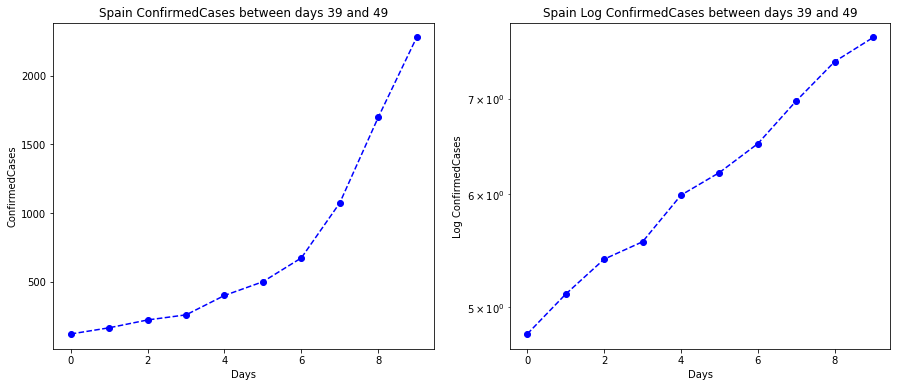

In [17]:

# plot ' Korea, South' covid-Confiremedcases graph between march 1 to march 11.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

###To do####  
y1 = all_data[(all_data['Country_Region']==country_dict['Spain']) & (all_data['Day_num']>39) & (all_data['Day_num']<=49)][['ConfirmedCases']]
x1 = range(0, len(y1))
ax1.plot(x1, y1, 'bo--')
ax1.set_title("Spain ConfirmedCases between days 39 and 49")
ax1.set_xlabel("Days")
ax1.set_ylabel("ConfirmedCases")

y2 = all_data[(all_data['Country_Region']==country_dict['Spain']) & (all_data['Day_num']>39) & (all_data['Day_num']<=49)][['ConfirmedCases']].apply(lambda x: np.log(x))
x2 = range(0, len(y2))
ax2.plot(x2, y2, 'bo--')
ax2.set_title("Spain Log ConfirmedCases between days 39 and 49")
ax2.set_xlabel("Days")
ax2.set_ylabel("Log ConfirmedCases")

## To do ###
ax2.set_yscale('log')
##apply log transform to y variables## 


In [18]:
##don`t touch this cell##

# Filter selected features
data = all_data.copy()
features = ['Id', 'ForecastId', 'Country_Region', 'Province_State', 'ConfirmedCases', 'Fatalities', 
       'Day_num']
data = data[features]

# Apply log transformation to all ConfirmedCases and Fatalities columns, except for trends
data[['ConfirmedCases', 'Fatalities']] = data[['ConfirmedCases', 'Fatalities']].astype('float64')
data[['ConfirmedCases', 'Fatalities']] = data[['ConfirmedCases', 'Fatalities']].apply(lambda x: np.log1p(x))

# Replace infinites
data.replace([np.inf, -np.inf], 0, inplace=True)


### <br/>Problem 2-2  complete below function to  Split data into train/test and apply linear regression

In [19]:
#  Split data into train/test
def split_data(df, train_lim, test_lim):
    
    df.loc[df['Day_num']<=train_lim , 'ForecastId'] = -1
    df = df[df['Day_num']<=test_lim]

    x_train = df[df.ForecastId == -1].drop(['ConfirmedCases', 'Fatalities'], axis=1)
    y_train_1 = df[df.ForecastId == -1]['ConfirmedCases']
    y_train_2 = df[df.ForecastId == -1]['Fatalities']
    x_test = df[df.ForecastId != -1].drop(['ConfirmedCases', 'Fatalities'], axis=1)

    # Clean Id columns and keep ForecastId as index
    x_train.drop('Id', inplace=True, errors='ignore', axis=1)
    x_train.drop('ForecastId', inplace=True, errors='ignore', axis=1)
    x_test.drop('Id', inplace=True, errors='ignore', axis=1)
    x_test.drop('ForecastId', inplace=True, errors='ignore', axis=1)
    
    return x_train, y_train_1, y_train_2, x_test #check to devide y_dataset 

# Linear regression model
def lin_reg(X_train, Y_train, X_test):
    regr = linear_model.LinearRegression()
    regr.fit(X_train, Y_train)
    y_pred = regr.predict(X_test)
    
    return regr, y_pred

In [20]:
##don`t touch this cell##
dates_list = ['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', 
                 '2020-03-10', '2020-03-11','2020-03-12','2020-03-13','2020-03-14','2020-03-15','2020-03-16','2020-03-17','2020-03-18',
                 '2020-03-19','2020-03-20','2020-03-21','2020-03-22','2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', 
                 '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05', 
                 '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14','2020-04-15','2020-04-16','2020-04-17','2020-04-18','2020-04-19',
                '2020-04-20','2020-04-21','2020-04-22','2020-04-23','2020-04-24','2020-04-25','2020-04-26','2020-04-27','2020-04-28','2020-04-29','2020-04-30',
                '2020-05-01','2020-05-02','2020-05-03','2020-05-04','2020-05-05','2020-05-06','2020-05-07','2020-05-08','2020-05-09','2020-05-10','2020-05-11',
                '2020-05-12','2020-05-13','2020-05-14','2020-05-15']
def plot_linreg_basic_country(data, country_name, dates_list, day_start, shift, train_lim, test_lim):
    
    data_country = data[data['Country_Region']==country_dict[country_name]]
    data_country = data_country.loc[data_country['Day_num']>=day_start]
    X_train, Y_train_1, Y_train_2, X_test = split_data(data_country, train_lim, test_lim)
    model, pred = lin_reg(X_train, Y_train_1, X_test)

    # Create a df with both real cases and predictions (predictions starting on March 12th)
    X_train_check = X_train.copy()
    X_train_check['Target'] = Y_train_1

    X_test_check = X_test.copy()
    X_test_check['Target'] = pred

    X_final_check = pd.concat([X_train_check, X_test_check])

    # Select predictions from March 1st to March 25th
    predicted_data = X_final_check.loc[(X_final_check['Day_num'].isin(list(range(day_start, day_start+len(dates_list)))))].Target
    real_data = train.loc[(train['Country_Region']==country_name) & (train['Date'].isin(dates_list))]['ConfirmedCases']
    dates_list_num = list(range(0,len(dates_list)))

    # Plot results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

    ax1.plot(dates_list_num, np.expm1(predicted_data))
    ax1.plot(dates_list_num, real_data)
    ax1.axvline(30-shift, linewidth=2, ls = ':', color='grey', alpha=0.5)
    ax1.legend(['Predicted cases', 'Actual cases', 'Train-test split'], loc='upper left')
    ax1.set_xlabel("Day count (from March " + str(1+shift) + " to March 25th)")
    ax1.set_ylabel("Confirmed Cases")

    ax2.plot(dates_list_num, predicted_data)
    ax2.plot(dates_list_num, np.log1p(real_data))
    ax2.axvline(30-shift, linewidth=2, ls = ':', color='grey', alpha=0.5)
    ax2.legend(['Predicted cases', 'Actual cases', 'Train-test split'], loc='upper left')
    ax2.set_xlabel("Day count (from March " + str(1+shift) + " to March 30th)")
    ax2.set_ylabel("Log Confirmed Cases")

    plt.suptitle(("ConfirmedCases predictions based on Log-Lineal Regression for "+country_name))

### <br/>Problem 2-3  using above function'plot_linreg_basic_country' run the Linear Regression workflow
 - your completed graph doesn't have to be the same as the example.


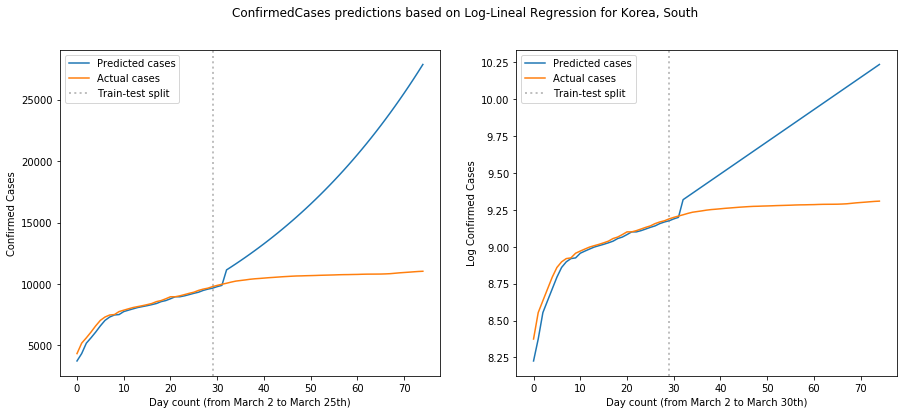

In [21]:
country_name = "Korea, South"
march_day = 1
day_start = 38+march_day
dates_list2 = dates_list[march_day:]
train_lim, test_lim = 70, 113
plot_linreg_basic_country(data, country_name, dates_list2, day_start, march_day, train_lim, test_lim)

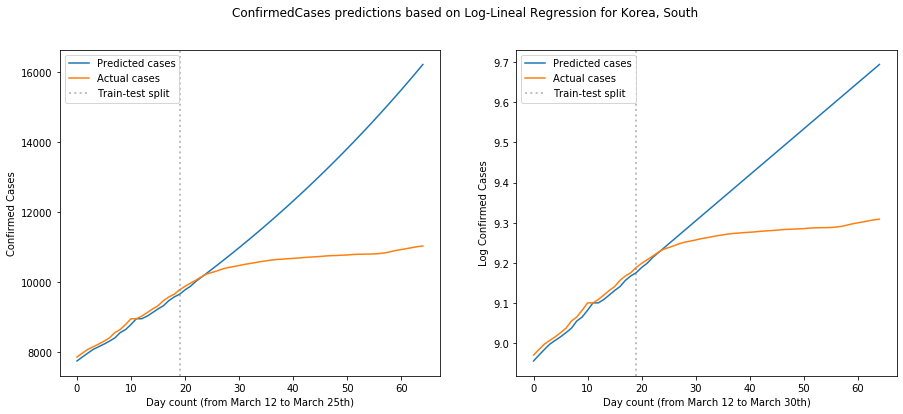

In [22]:
country_name = "Korea, South"
march_day = 11
day_start = 38+march_day
dates_list2 = dates_list[march_day:]
train_lim, test_lim = 70, 113
plot_linreg_basic_country(data, country_name, dates_list2, day_start, march_day, train_lim, test_lim)

### <br/>Problem 2-4 Describe the significance and limitations of the graph above.

### YOUR ANSWER HERE ###

In [23]:
'''
그래프는 표본이 상향세인 만큼, 학습하는 데이터에 fit되어 지속적인 상승을 예측한다.

하지만 예측하는 그래프는 추후 convex, concave할 수도 있다는 점을 고려하지 않는다.

즉, 단순 증가세면 증가한다는 것만 예측을 할 수 있는 것이고 
격리, 사회적 거리두기등으로 인한 감소하는 감염률을 반영하지 못한다.
'''

'\n그래프는 표본이 상향세인 만큼, 학습하는 데이터에 fit되어 지속적인 상승을 예측한다.\n\n하지만 예측하는 그래프는 추후 convex, concave할 수도 있다는 점을 고려하지 않는다.\n\n즉, 단순 증가세면 증가한다는 것만 예측을 할 수 있는 것이고 \n격리, 사회적 거리두기등으로 인한 감소하는 감염률을 반영하지 못한다.\n'

## 3. Caculating Stringency Indexes of six countries 

Reference : https://www.bsg.ox.ac.uk/sites/default/files/Calculation%20and%20presentation%20of%20the%20Stringency%20Index.pdf

Look at the document above and learn about Stringency Index (not legacy stringency index!!)

## 3-1 Data filtering

In [24]:
#load csv file you care ("OxCGRT_latest.csv")
###YOUR CODE HERE###

data = pd.read_csv("data/OxCGRT_latest.csv")

In [25]:
#Filter rows with six unique countries by 'CountryName'
#('CountryName' == Australia, China, Japan, New Zealand, Singapore, South Korea)

###YOUR CODE HERE###
data_filtered = data[data.CountryName.isin(['Australia', 'China', 'Japan', 'New Zealand', 'Singapore', 'South Korea'])]
data_filtered

,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,...,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay
947,Australia,AUS,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.00,0.0,0.00
948,Australia,AUS,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.00,0.0,0.00
949,Australia,AUS,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.00,0.0,0.00
950,Australia,AUS,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.00,0.0,0.00
951,Australia,AUS,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17720,Singapore,SGP,20200510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,22460.0,20.0,NaN,87.83,NaN,86.67
17721,Singapore,SGP,20200511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,23336.0,20.0,NaN,87.83,NaN,86.67
17722,Singapore,SGP,20200512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,23787.0,21.0,NaN,87.83,NaN,86.67
17723,Singapore,SGP,20200513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,24671.0,21.0,NaN,87.83,NaN,86.67


In [26]:
#Drop columns you don't need
#print dataframe you care about
###YOUR CODE HERE###

data.drop(data.columns[[1, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]], axis=1, inplace=True)
#use columns : 
"""
['CountryName', 'Date', 'C1_School closing', 'C1_Flag', 'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events','C3_Flag',
'C4_Restrictions on gatherings','C4_Flag','C5_Close public transport','C5_Flag','C6_Stay at home requirements','C6_Flag',
'C7_Restrictions on internal movement','C7_Flag','C8_International travel controls','H1_Public information campaigns','H1_Flag']
"""

"\n['CountryName', 'Date', 'C1_School closing', 'C1_Flag', 'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events','C3_Flag',\n'C4_Restrictions on gatherings','C4_Flag','C5_Close public transport','C5_Flag','C6_Stay at home requirements','C6_Flag',\n'C7_Restrictions on internal movement','C7_Flag','C8_International travel controls','H1_Public information campaigns','H1_Flag']\n"

## 3-2 Calculating Stringency Index

you can use some pakages to deal with 'nan' values

In [27]:
#stringency calculation
data = data.fillna(0)
#step1 : calculate weight for a policy of general scope
###YOUR CODE HERE###

idx = ['C1_School closing','C2_Workplace closing','C3_Cancel public events','C4_Restrictions on gatherings','C5_Close public transport','C6_Stay at home requirements','C7_Restrictions on internal movement','H1_Public information campaigns', 'C8_International travel controls']
idx_flag = ['C1_Flag', 'C2_Flag', 'C3_Flag', 'C4_Flag', 'C5_Flag', 'C6_Flag', 'C7_Flag', 'H1_Flag']
maxn = []
w = 0

for i in idx:
    if i == 'C8_International travel controls':
        maxn.append(data[i].max())
        break
    else:
        w = w + 1/(data[i].max()+1)
        maxn.append(data[i].max())
        
w = round(w/len(idx),10)

In [28]:
#step2 : calculate sub-indices
#calculate C1-C9, G1-G8, and I1-I9 

###YOUR CODE HERE###

ctarget = ['I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'nz']
cname = ['I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9']
cal = pd.DataFrame([],columns=ctarget)
num_index = 0

for i in cname:
    if i == 'I9':
        cal[i] = 100*(data[idx[num_index]]/maxn[num_index])
    else:
        cal[i] = 100*(data[idx[num_index]]*(1-w)/maxn[num_index]+w*data[idx_flag[num_index]])
        num_index = num_index + 1
        
cal['nz'] = (cal != 0).astype(int).sum(axis=1)-1
#cal[70:90]

In [29]:
#step3 : calculate stringency index I (up to 2 decimal points)
###YOUR CODE HERE###

needed = 6

cal['si'] = 1/9 * (cal['I1']+cal['I2']+cal['I3']+cal['I4']+cal['I5']+cal['I6']+cal['I7']+cal['I8']+cal['I9'])

#if the number of non-zero values is less than 6, reject
cal.loc[cal.nz < needed, 'si'] = 0

#cal[75:89]

In [30]:
#step4 : make your stingency index array into dataframe(column name = 'my_StringencyIndex') and concat it(axis = 1) to the result of 3-1 
###YOUR CODE HERE###

data_filtered['my_StringencyIndex']=cal['si']

#Example
data_filtered[100:110]

,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,...,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay,my_StringencyIndex
1047,Australia,AUS,20200410,3.0,0.0,2.0,0.0,2.0,1.0,4.0,...,0.0,0.0,NaN,6152.0,52.0,70.91,70.91,67.38,67.38,72.085048
1048,Australia,AUS,20200411,3.0,0.0,2.0,0.0,2.0,1.0,4.0,...,0.0,0.0,NaN,6238.0,54.0,70.91,70.91,67.38,67.38,72.085048
1049,Australia,AUS,20200412,3.0,0.0,2.0,0.0,2.0,1.0,4.0,...,0.0,0.0,NaN,6289.0,57.0,70.91,70.91,67.38,67.38,72.085048
1050,Australia,AUS,20200413,3.0,0.0,2.0,0.0,2.0,1.0,4.0,...,0.0,0.0,NaN,6322.0,61.0,70.91,70.91,67.38,67.38,72.085048
1051,Australia,AUS,20200414,3.0,0.0,2.0,0.0,2.0,1.0,4.0,...,0.0,0.0,NaN,6366.0,61.0,70.91,70.91,67.38,67.38,72.085048
1052,Australia,AUS,20200415,3.0,0.0,2.0,0.0,2.0,1.0,4.0,...,0.0,0.0,NaN,6416.0,61.0,70.91,70.91,67.38,67.38,72.085048
1053,Australia,AUS,20200416,3.0,0.0,2.0,0.0,2.0,1.0,4.0,...,0.0,0.0,NaN,6458.0,63.0,70.91,70.91,67.38,67.38,72.085048
1054,Australia,AUS,20200417,3.0,0.0,2.0,0.0,2.0,1.0,4.0,...,0.0,0.0,NaN,6497.0,63.0,70.91,70.91,67.38,67.38,72.085048
1055,Australia,AUS,20200418,2.0,0.0,2.0,0.0,2.0,1.0,4.0,...,0.0,0.0,NaN,6533.0,67.0,68.26,68.26,63.81,63.81,69.320988
1056,Australia,AUS,20200419,2.0,0.0,2.0,0.0,2.0,1.0,4.0,...,0.0,0.0,NaN,6586.0,69.0,68.26,68.26,63.81,63.81,69.320988


## Problem4. Topic Modeling (Clustering analysis of documents) for tweets related to COVID-19
A **topic model** is a type of statistical model for discovering the abstract "topics" that occur in a collection of documents.
 Please refer to [wikipedia](https://en.wikipedia.org/wiki/Topic_model#:~:text=In%20machine%20learning%20and%20natural,structures%20in%20a%20text%20body.) for detailed information.
- These documents were crawled from *twitter* with some *COVID-19* related keywords . All tweets are in English but have a lot of noisy information.
- In this problem, your goal is to cluster tweets according to the latent 'topics' with the statistical method, automatically. 


### Load the csv file using pandas library

In [31]:
df = pd.read_csv('data/covid_twitter.csv') #set your working directory
text_en = df['text']
print(df.shape)
print(df.head())
text_en

(36121, 2)
   Unnamed: 0                                               text
0           6  .@PatriceHarrisMD spoke with @YahooFinance abo...
1          14  #CoronaUpdate | Johns Hopkins University has s...
2          17  Singapore donates 40,000 test kits to the Phil...
3          28  Lockdowns, drones: Will things ever go back to...
4          30  Does the #COVID19 pandemic have you feeling ou...


0        .@PatriceHarrisMD spoke with @YahooFinance abo...
1        #CoronaUpdate | Johns Hopkins University has s...
2        Singapore donates 40,000 test kits to the Phil...
3        Lockdowns, drones: Will things ever go back to...
4        Does the #COVID19 pandemic have you feeling ou...
                               ...                        
36116    Top public health officer says coming week a c...
36117    Went for a run this evening...\nGod reminded m...
36118    Trump ~ Millions of face masks being made, tho...
36119    For many students in our state, #COVID19 closu...
36120    Will the #coronavirus pandemic of 2020 come to...
Name: text, Length: 36121, dtype: object

### Problem 4-1 Text Preprocessing
First of all, you should process the documents so that the model will not be perturbed by the noisy information

**a. Remove the following characters with *'re'* module in each tweets**
- special characters ( # @ , . | ? ! )
- *COVID* relavant words (COVID19, coronavirus, coronaoutbreak)

In [32]:
import string

### YOUR CODE HERE ###
# replace like @name or #name
text_en = text_en.str.replace(r'(^|\W)[@|#]\w+', ' ', regex=True)
# remove special characters
text_en = text_en.str.translate(str.maketrans('', '', string.punctuation))
# case-sensitive -> unsensitive
text_en = text_en.str.replace(r"[^\w\s]", "").str.lower()
# remove COVID relavant words
text_en = text_en.str.replace(r'\bcorona\w+|\bcovid\w+', '', regex=True)
# character \n, \t to null
text_en = text_en.str.replace(r'\\n|\\t', ' ', regex=True)
# remove number ( March '24', '2020', ... )
text_en = text_en.str.replace(r'[0-9]+', ' ', regex=True)
# amp? remove
text_en = text_en.str.replace(r'\bamp\b', ' ', regex=True)
text_en


0          spoke with  about the  stimulus package maki...
1           johns hopkins university has said it did no...
2        singapore donates   test kits to the philippin...
3        lockdowns drones will things ever go back to n...
4        does the  pandemic have you feeling outofcontr...
                               ...                        
36116    top public health officer says coming week a c...
36117    went for a run this evening\ngod reminded me t...
36118    trump  millions of face masks being made thous...
36119    for many students in our state  closures are i...
36120    will the  pandemic of   come to be seen as a m...
Name: text, Length: 36121, dtype: object

**b. Remove the *stop words* in each tweets**

*Stop words* are words which should be filtered out before given to the model. Please refer to [wikipedia](https://en.wikipedia.org/wiki/Stop_words#:~:text=In%20SEO%20terminology%2C%20stop%20words,save%20space%20in%20their%20databases.) for detailed information 
- First, you should download the stop word set from *nltk* module.

In [33]:
### NLP toolkit ###
import nltk
from nltk.corpus import stopwords

In [34]:
### Download the set with this
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
### check the set with this
stop_words = set(stopwords.words('english'))
print(stop_words)

{'s', 'yourselves', 'am', 'of', "won't", 'are', 'after', 'me', 'where', "mightn't", 'whom', 'itself', 'any', 'that', 'over', 'just', 'between', 'aren', "haven't", 'under', 'both', 'our', "shouldn't", 'ain', "wasn't", 'through', 'below', 'but', 'at', 'didn', "doesn't", "aren't", 'yourself', 'into', 'doesn', 'y', "wouldn't", 'too', 'in', 'their', 'most', "hasn't", 'here', 'about', 'these', 'those', 'once', 'other', 'until', 'with', "couldn't", 'hers', 'should', 'on', "that'll", 'have', 'now', "shan't", 'the', 'we', 'my', 'up', 'which', 'then', 'mightn', 'mustn', 'no', 'very', 'll', 'before', 'its', 'some', 'why', "weren't", 'off', 'were', 't', 'few', 'an', 'all', "it's", 'needn', "you're", 'they', 'be', 'only', 're', 'did', 'hasn', 'don', 'haven', 'does', 'there', 'weren', 'ours', 'will', 'again', 'by', 'was', 'ourselves', "you'll", 'her', 'against', 'nor', 'hadn', 'isn', 'shan', 'd', 'himself', 'to', 'm', 'such', "needn't", 'above', 'he', 'o', 'your', 'won', 'has', 'them', 'each', 'beca

**a. Update your set with some stop words which are not needed for modeling, you think.**

In [36]:
### YOUR CODE HERE ###
stop_words.add("onto")
stop_words.add("among")
stop_words.add("till")
stop_words.add("would")
stop_words.add("wouldn't")
stop_words.add("could")
stop_words.add("couldn't")
stop_words.add("may")
stop_words.add("must")
stop_words.add("amid")
print(stop_words)

{'s', 'yourselves', 'am', 'of', "won't", 'are', 'after', 'me', 'where', "mightn't", 'whom', 'itself', 'any', 'that', 'over', 'just', 'between', 'aren', "haven't", 'under', 'both', 'our', "shouldn't", 'ain', "wasn't", 'through', 'below', 'but', 'at', 'didn', "doesn't", "aren't", 'yourself', 'into', 'doesn', 'y', "wouldn't", 'too', 'in', 'their', 'most', "hasn't", 'here', 'about', 'these', 'those', 'once', 'other', 'till', 'until', 'with', "couldn't", 'hers', 'should', 'on', "that'll", 'have', 'now', "shan't", 'the', 'we', 'may', 'my', 'up', 'which', 'then', 'mightn', 'mustn', 'no', 'very', 'll', 'before', 'its', 'onto', 'some', 'why', "weren't", 'off', 'were', 't', 'few', 'an', 'all', "it's", 'needn', "you're", 'they', 'be', 'only', 're', 'did', 'hasn', 'don', 'haven', 'does', 'there', 'weren', 'ours', 'would', 'will', 'again', 'by', 'was', 'ourselves', "you'll", 'her', 'against', 'nor', 'hadn', 'isn', 'shan', 'd', 'himself', 'to', 'm', 'such', "needn't", 'above', 'he', 'o', 'your', 'am

**b. Remove stop words from the tweet dataset with your own stop words set**

In [37]:
from nltk.tokenize import word_tokenize

#Trying Stemming, But Result is not different from non-using.
#from nltk.stem import PorterStemmer
#s=PorterStemmer()

### YOUR CODE HERE ###
text_stop = pd.DataFrame([],columns=['text'])
text_stop['text'] = text_en
text_stop['text'].dropna(inplace=True)
text_stop['tokenize'] = text_stop['text'].dropna().apply(word_tokenize)
text_stop['tokenize'] = text_stop['tokenize'].dropna().apply(lambda x: [item for item in x if item not in stop_words])

text_stop

,text,tokenize
0,spoke with about the stimulus package maki...,"[spoke, stimulus, package, making, way, congre..."
1,johns hopkins university has said it did no...,"[johns, hopkins, university, said, authorize, ..."
2,singapore donates test kits to the philippin...,"[singapore, donates, test, kits, philippines]"
3,lockdowns drones will things ever go back to n...,"[lockdowns, drones, things, ever, go, back, no..."
4,does the pandemic have you feeling outofcontr...,"[pandemic, feeling, outofcontrol, overwhelmed,..."
...,...,...
36116,top public health officer says coming week a c...,"[top, public, health, officer, says, coming, w..."
36117,went for a run this evening\ngod reminded me t...,"[went, run, evening, god, reminded, matter, ha..."
36118,trump millions of face masks being made thous...,"[trump, millions, face, masks, made, thousands..."
36119,for many students in our state closures are i...,"[many, students, state, closures, impacting, a..."


### Problem 4-2 Convert the documents to a tf-idf matrix 
*TF-IDF* is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. Please refer to [this](http://mlwiki.org/index.php/TF-IDF)
- Please use the results of 3-1, not the results of 3-2
- Print your tf-idf matrix after converting it into *pandas.DataFrame* format
- Set your own hyperparams.

In [38]:
### scikit learn ###
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
### YOUR CODE HERE ###
tfidf = TfidfVectorizer(max_features =2000, max_df=0.95, min_df=0)

#generate tf-idf term-document matrix
text_stop['token_to_str'] = text_stop.tokenize.dropna(0).apply(lambda x : ' '.join(x))
documents = text_stop['token_to_str']
documents.dropna(inplace=True)
A_tfidf_sp = tfidf.fit_transform(documents)  #size D x V
tfidf_dict = tfidf.get_feature_names()
data_array = A_tfidf_sp.toarray()
data = pd.DataFrame(data_array, columns=tfidf_dict)
data

,abbott,ability,able,abroad,absolutely,abuja,abuse,access,according,account,...,york,yorkers,youll,young,youre,youth,youtube,youve,zero,zone
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36084,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36085,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36086,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36087,0.0,0.262512,0.0,0.0,0.0,0.0,0.0,0.209367,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Problem 4-3 Cluster the tf-idf matrix of tweets using the *K-Means* algorithm.
- Set your own hyperparams

In [40]:
### scikit learn ###
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

**a. Find an optimal value for the number of clusters using the *elbow method***
- Draw the SSD(Sum of the Squared Distance) of *K-Means* algorithm by the number of clusters, K, as shown in the example


Example
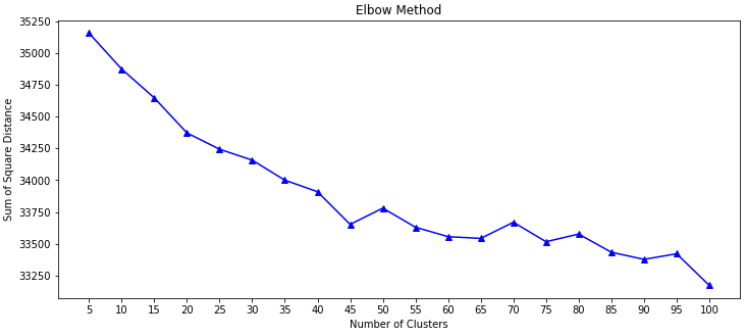

In [41]:
### YOUR CODE HERE ###
kmeans = KMeans(n_clusters=2).fit(A_tfidf_sp)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

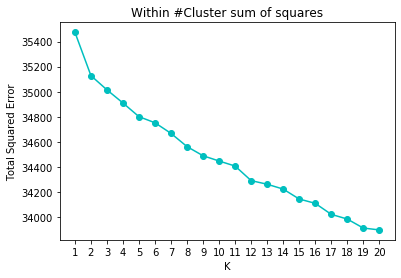

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

def elbow(x,n_k):
    sse=[]
    for i in range(1,n_k+1):
        km=KMeans(n_clusters=i,init="k-means++").fit(x)
        sse.append(km.inertia_)
    return sse, range(1,n_k+1)

def wcss(input,k):
     Info=elbow(input,k)
     plt.plot(Info[1],Info[0],marker="o",color="c")
     plt.xticks(Info[1])
     plt.xlabel("K")
     plt.ylabel("Total Squared Error")
     plt.title("Within #Cluster sum of squares")
     plt.show()

wcss(A_tfidf_sp, 20)

**b. Based on the plot, pick a proper value for K and justify why.**

It is OK that you can't find any proper value for K. But, specify why.

**### YOUR DESCRIPTION HERE ###**
 
 

In [43]:
'''
K-Means Algorithm은 그래프의 일부만을 때서 보아도 전체의 흐름과 같음을 알 수 있지만, 
TSE가 linear하게 떨어지는 것으로 보아 K의 값이 언제가 최적인지 알기가 어렵다.

즉, TSE가 감소하는 것이 convex하지 않아 어느 K값이 최적의 값인지 알기가 어렵다.
Cluster의 수가 많으면 많을수록 TSE가 일정하게 감소하기에 Tf-idf에서의 feature 수에 적당히 맞게끔 분류하는 것이 좋아보인다.
'''

'\nTSE가 감소하는 것이 convex하지 않아 어느 K값이 최적의 값인지 알기가 어렵다.\nCluster의 수가 많으면 많을수록 TSE가 일정하게 감소하기에 Tf-idf에서의 feature 수에 적당히 맞게끔 분류하는 것이 좋아보인다.\n'

### Problem 4-4 Visualize your clusters to evaluate the results of clustering analysis.

**a. Assgin the cluster index for each tweet with K=14**
- In other words, predict the label for each example

In [44]:
### YOUR CODE HERE ###

clusters = MiniBatchKMeans(n_clusters=14, init_size=1024, batch_size=2048, random_state=20).fit_predict(A_tfidf_sp)

**b. Fill the function in below, which visualizes your clusters with PCA and TSNE**

Both *PCA* and *TSNE* are the most common visualization techniques in the machine learning community. It is usually known that TSNE could capture the non-linear relationship between datapoints. For more detailed information, please refer to [this](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)
- At first, this function randomly selects some samples for fitting PCA, depending on your device's capability.
- Get the PCA matrices from the results of 4-2(tf-idf matrix) where the number of principal components is 2, each.
- For TSNE, you can use the *TSNE().fit_transform()* function. 

Example
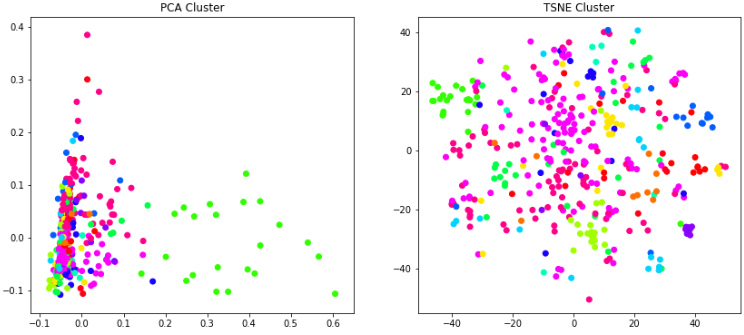

In [45]:
### visualization methods ###
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
### for plotting ###
import matplotlib.cm as cm

In [46]:
def plot_tsne_pca(data, labels):
    '''
    This function plots the PCA and t-SNE on 2D plane.
    args:
        data: tf-idf weight matrix
        labels: predictions from K-means
    '''
    # initial set up and random pick up samples
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=2000, replace=False)
    
    ######################## YOUR CODE HERE ########################
    '''
    pca (2000 x 2) : extract 2 eigenvectors that have the most explained variance
    tsne (2000 x 2) : feed the 50 principal components to t-SNE
    '''

    max_items_sample = data[max_items]
    pca_num_components = 2
    pca = PCA(n_components=pca_num_components).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    #################################################################
    
    # random pick certain size of data points for visiualization
    idx = np.random.choice(range(pca.shape[0]), size=400, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    # plot PCA
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster')
    
    # plot t-SNE
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster')

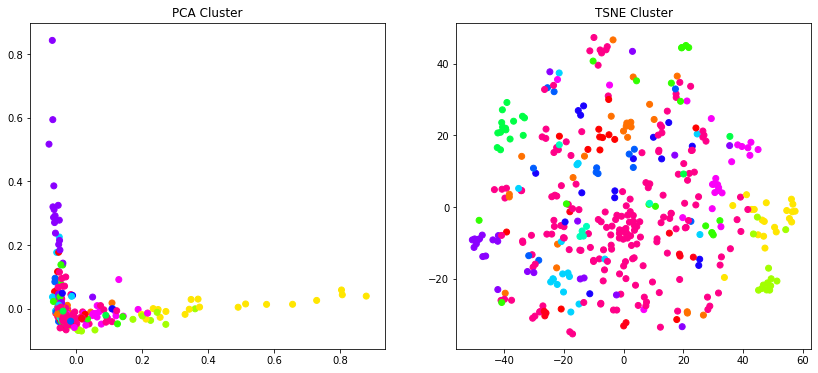

In [47]:
### YOUR CODE HERE ###
# plot PCA and t-SNE reduced data with above function

plot_tsne_pca(A_tfidf_sp, clusters)

### Problem 4-5 Extract keywords from each clusters

**a. get the top keywords from each clusters you've got from 4-4 (a.) based on the tf-idf matrix values**

- Use the function in below or make your own function to achieve the same goal with this function.

Example
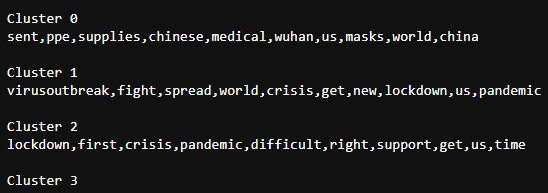

In [48]:
def get_top_keywords(data, clusters, labels, n_terms=10):
    '''
    This function displays the top keywords based on tf-idf score.
    data = tf-idf array
    clusters = assigned cluster index
    labels = vectorizer.get_feature_names()
    n_terms = top n keywords
    '''
    #  based on predictions
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    # loop through each clusters and print top 10 score words
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))

In [49]:
### YOUR CODE HERE ###
get_top_keywords(A_tfidf_sp, clusters, tfidf.get_feature_names(), n_terms=10)


Cluster 0
says,pandemic,ministry,crisis,people,workers,mental,care,public,health

Cluster 1
know,one,time,cases,world,trump,people,deaths,join,us

Cluster 2
march,reports,number,bringing,reported,confirmed,new,deaths,total,cases

Cluster 3
reported,rises,new,total,number,deaths,first,cases,toll,death

Cluster 4
spread,finance,suicide,states,uk,people,minister,state,government,lockdown

Cluster 5
one,time,fight,know,response,us,world,people,global,pandemic

Cluster 6
know,get,day,time,today,one,sure,people,going,im

Cluster 7
time,crisis,fight,people,support,please,spread,us,need,help

Cluster 8
need,look,dont,patients,one,people,hospital,days,take,like

Cluster 9
people,ppe,world,face,trump,frontline,healthcare,masks,workers,china

Cluster 10
spread,everyone,keep,share,dont,people,safe,home,please,stay

Cluster 11
negative,testing,people,cases,tests,test,york,tested,new,positive

Cluster 12
dont,need,trump,day,world,crisis,get,one,time,people

Cluster 13
patients,fight,conference,mask

**b. According to the keywords selected from (a.), describe the differences between clusters or guess the topic of tweets in the specific cluster**

**### YOUR DESCRIPTION HERE ###**

TF-IDF는 특정 단어가 그 문장에서 얼마나 중요한지에 대해 수치적으로 표현한 것이라, TF-IDF를 기반으로 K-means Algorithm을 수행한 결과는 각 문장을 대표하는 단어를 기준으로 군집화됐을 것이다. 

가장 두드러지게 차이나는 것은 12번과 13번 클러스터로 12번은 트럼프, 사람 그리고 위기가 들어간 것으로 보아 이번 질병에 의해 세계가 위험에 처했다는 것, 시간이 필요하다는 것에 대해 'dont'라고 트럼프가 바이러스에 의한 여파를 부정하였다는 것이 주제라면 13번은 중국에서는 전문가들이 질병과 싸우고 있으며 이와 관련된 키워드로 의료 물자, 마스크등이 있는 것으로 보아 중국에서의 현 상황이 토픽일 것이다.

Cluster 0 : 전염병으로 인한 경제 위기와 그에 필요한 정신적 치료<br>
Cluster 1 : 사람들이 COVID19에 의해 죽어가는 소식과 세계가 뭉쳐야 한다는 것과 관련된 트윗(join)<br>
Cluster 2 : 사람들이 COVID19에 죽은 통계, 리포트<br>
Cluster 3 : 2번과 비슷하나, 사망자 수가 올라간다는 동향을 말하는 트윗들<br>
Cluster 4 : 영국의 경제가 무너지고 있고, 국경을 봉쇄했다는 트윗<br>
Cluster 5 : 세계의 사람들이 전염병과 맞서 싸워야 한다는 트윗<br>
Cluster 6 : 사람들이 시간을 가진다라는 것으로 보아 시간과 관련된 트윗(자가격리나, 재택근무등)<br>
Cluster 7 : 전염을 막기 위해선 도움이 필요하다는 트윗<br>
Cluster 8 : 병원에서 치료를 받고 있는 환자들에 관련한 트윗<br>
Cluster 9 : 중국의 상황과 이에 대한 트럼프의 발언 관련 트윗<br>
Cluster 10 : 사회적 거리두기, 재택근무 관련 트윗<br>
Cluster 11 : 양성, 음성이 나오는 것으로 보아 진단과 관련한 트윗<br>
Cluster 12 : 세계가 위험에 처했다는 것과 트럼프가 바이러스에 의한 여파를 부정하였다는 것(dont need)<br>
Cluster 13 : 중국에서의 COVID19와 관련된 이슈 (의료물자, 전문가들/의사들이 환자를 치료하기 위한 사투 등 )

### End of HW4 ###
Thanks for all your works